<a href="https://colab.research.google.com/github/MalithaPrabhashana/patternRecognitionCNN/blob/main/A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!kaggle datasets download -d joebeachcapital/realwaste

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/realwaste
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 649M/657M [00:11<00:00, 74.9MB/s]
100% 657M/657M [00:11<00:00, 61.5MB/s]


In [2]:
import pandas as pd
import zipfile

# Extract dataset
with zipfile.ZipFile("realwaste.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [ ]:
import os

# List all files in the current directory
print(os.listdir("realwaste-main/RealWaste"))


['Food Organics', 'Glass', 'Metal', 'Vegetation', 'Paper', 'Textile Trash', 'Miscellaneous Trash', 'Plastic', 'Cardboard']


In [ ]:
# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir("realwaste-main/RealWaste"):
    class_path = os.path.join("realwaste-main/RealWaste", class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

Class: Food Organics, Number of images: 411
Class: Glass, Number of images: 420
Class: Metal, Number of images: 790
Class: Vegetation, Number of images: 436
Class: Paper, Number of images: 500
Class: Textile Trash, Number of images: 318
Class: Miscellaneous Trash, Number of images: 495
Class: Plastic, Number of images: 921
Class: Cardboard, Number of images: 461


In [ ]:
unzipped_dir = "realwaste-main/RealWaste"

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import shutil


# Set paths
dataset_dir = unzipped_dir
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test splits
base_dir = "realwaste-main/SplittedWasteData"
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create folders for each class in train, val, and test directories
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Split the dataset for each class
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    # Split images into 60% train, 20% validation, 20% test
    train_images, test_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Move images to the respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset split completed!")

Dataset split completed!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import zipfile
import shutil
import os

In [ ]:
def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Check if it's a valid image
            except (IOError, SyntaxError):
                print(f"Invalid file: {file_path}")
                os.remove(file_path)  # Remove problematic files

# Check both training and validation directories
check_images(base_dir + "/train")
check_images(base_dir + "/val")

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(base_dir+"/train",
                                          target_size=(150,150),
                                          batch_size=64,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory(base_dir+"/val",
                                          target_size=(150,150),
                                          batch_size=64,
                                          class_mode='categorical')

Found 2848 images belonging to 9 classes.
Found 950 images belonging to 9 classes.


In [ ]:
print("Training Dataset: ", train_dataset.samples)
print("Validation Dataset: ", validation_dataset.samples)

Training Dataset:  2848
Validation Dataset:  950


In [ ]:
class_indices = train_dataset.class_indices
print(class_indices)

{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[[0.69411767 0.76470596 0.85098046]
  [0.7137255  0.77647066 0.8745099 ]
  [0.5803922  0.6392157  0.72156864]
  ...
  [0.76470596 0.8431373  0.93725497]
  [0.72156864 0.8000001  0.8941177 ]
  [0.7176471  0.7960785  0.89019614]]

 [[0.5372549  0.6039216  0.68235296]
  [0.6901961  0.7490196  0.83921576]
  [0.654902   0.7058824  0.7803922 ]
  ...
  [0.7019608  0.7803922  0.8745099 ]
  [0.69411767 0.7725491  0.86666673]
  [0.7019608  0.7725491  0.86666673]]

 [[0.62352943 0.6745098  0.7411765 ]
  [0.6745098  0.72156864 0.8078432 ]
  [0.63529414 0.6862745  0.7607844 ]
  ...
  [0.72156864 0.8000001  0.8941177 ]
  [0.7254902  0.80392164 0.8980393 ]
  [0.67058825 0.7411765  0.82745105]]

 ...

 [[0.57254905 0.6627451  0.7960785 ]
  [0.5882353  0.6784314  0.80392164]
  [0.48627454 0.5764706  0.7019608 ]
  ...
  [0.50980395 0.5882353  0.6862745 ]
  [0.5294118  0.62352943 0.7254902 ]
  [0.52156866 0.6156863  0.7254902 ]]

 [[0.5294118  0.61960787 0.74509805]
  [0.556

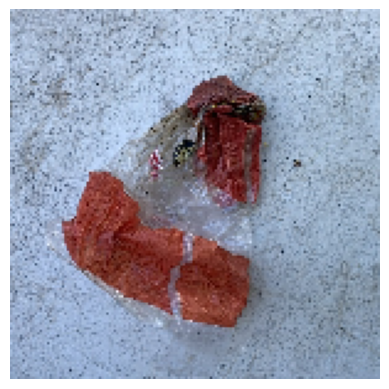

In [ ]:
# Load one batch of images and labels
X_batch, y_batch = next(train_dataset)

# Display the first image from the batch
print(y_batch[0])
print(X_batch[0])

plt.imshow(X_batch[0])
plt.axis('off')
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=9, activation='softmax')
])

In [ ]:
# Compile the model
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
    validation_data=validation_dataset,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.1416 - loss: 2.6080 - val_accuracy: 0.2800 - val_loss: 2.0834
Epoch 2/20
 1/44 ━━━━━━━━━━━━━━━━━━━━ 1:31 2s/step - accuracy: 0.2188 - loss: 2.0987

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 326ms/step - accuracy: 0.2188 - loss: 2.0987 - val_accuracy: 0.2937 - val_loss: 2.0827
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.2565 - loss: 2.0597 - val_accuracy: 0.2579 - val_loss: 2.0158
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 476ms/step - accuracy: 0.3125 - loss: 2.0080 - val_accuracy: 0.2800 - val_loss: 1.9781
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.2780 - loss: 1.9799 - val_accuracy: 0.3558 - val_loss: 1.8261
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.3125 - loss: 1.9198 - val_accuracy: 0.3505 - val_loss: 1.8234
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.3442 - loss: 1.8189 - val_accuracy: 0.3905 - val_loss: 1.6439
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - accuracy: 0.4062 - loss: 1.8425 - val_accuracy: 0.3842 - val_loss: 1.6569
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.3944 - loss: 1.6568 - val_accuracy: 0.4421 - val_